In [ ]:
'''
file to plot using the 'output_expdopp_4point.csv'
exp_dopp =  downconfreq + dopp_firstmoment - tfreq 
where treq = 8410932002.0000 #tfreq = transmitted freq given in .obs file of Akatsuki X Band 8.4 GHz


structure of the csv-  
i,timesec,power_total,downconfreq,dopp_firstmoment,exp_dopp, second_moment,RTEC
'''

"\nfile to plot using the 'output_expdopp_4point.csv'\nexp_dopp =  downconfreq + dopp_firstmoment - tfreq \nwhere treq = 8410932002.0000 #tfreq = transmitted freq given in .obs file of Akatsuki X Band 8.4 GHz\n\n\nstructure of the csv-  \ni,timesec,power_total,downconfreq,dopp_firstmoment,exp_dopp, second_moment,RTEC\n"

In [1]:
#-----------------------------------------------------------------------------------------------------------------
#importing libraries
from __future__ import print_function, division
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.interpolate as interp
import argparse
import copy
import datetime
import math
from matplotlib.gridspec import GridSpec
global low, up
from astropy.io import fits as f
from astropy.table import Table as t
from astropy.utils.data import download_file
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
from mpl_toolkits import mplot3d
from scipy.optimize import curve_fit
import scipy.optimize as so
import warnings
warnings.filterwarnings("ignore")
#-----------------------------------------------------------------------------------------------------------------

In [2]:
#importing data from my GitHub
# url = 'https://raw.githubusercontent.com/jovian-explorer/Sun/main/MOM/output_expdopp_4point.csv'
url = '/home/dev/Sun/output_expdopp_4point.txt'
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_colwidth', None)
dataset = pd.read_csv(url,delimiter = ',')
print(dataset.head(1))
#-----------------------------------------------------------------------------------------------------------------

   1   21720.0  43.40549452131652  8410640000.0  -42400.492706323195  \
0  1  21720.25           41.14198  8.410640e+09        -42396.381766   

   -334402.4927062988  4.726165950751449  2.751054161769941e+30  
0      -334398.381765           5.229972           2.993352e+30  


In [3]:
#-----------------------------------------------------------------------------------------------------------------
# accessing the different columns of the csv dataset I made above
dataset.columns = ["i","timesec","power_total","downconfreq","dopp_firstmoment","exp_dopp","second_moment","RTEC"]
#storing values for each column into a separate arrays

'''
Finding Moments of powSpec (Power spectral density distribution)- by defining "powSpecmoment" function - 
zeroth moment = power, 
first moment = doppler freq
second = width of freq spread 
downconfreq - RF_TO_IF downconv frequency as read from header file
final experimental/Observed doppler shift observed in received signal is (given by heterodyning principle)  
exp_dopp = Downconversion frequency + dopp_firstmoment_freq - transmitted freq
IV - write output in "output.txt" file containing :  time in seconds----power(first moment)-----measured dopp freq
'''
i = np.array(dataset.i)           		  	                # Values of iteration
timesec= np.array(dataset.timesec)               	        # Values of time in sec 6300.1, 6300.2
power_total= np.array(dataset.power_total)                # Values of zeroth moment 
downconfreq= np.array(dataset.downconfreq)                # Values of downconfreq
dopp_firstmoment= np.array(dataset.dopp_firstmoment)      # Values of first moment 
exp_dopp= np.array(dataset.exp_dopp)                	    # Values of exp_dopp
second_moment = np.array(dataset.second_moment)	          # Values of second_moment
RTEC = np.array(dataset.RTEC)                             # Values of Radial Total electron content
#-----------------------------------------------------------------------------------------------------------------

In [ ]:
#------------------------------------------------
m = 9.1*10**(-31)
e = 1.6*10**(-19)
frec = 8410640000.0
k= 5.9
l_2= 2.4235* 10**11
alpha = 1.14*10**(-24)
L = 3.9195*10**11
ds=(1.469* 10**11)/len(i)
R = 1.252* 10**10
#------------------------------------------------

In [ ]:
density = RTEC/R
plasma_frequency_model_1 = np.sqrt(4*np.pi*density*(e**2)/m)#Yamato et al. 2002
plasma_frequency_model_2 = np.sqrt(density*(e**2)/(np.pi*m))#Chen F. F., 1974

#refractive index equation taken from Hollweg et al. 1970
refractive_index_model_1 = np.sqrt(1 - (plasma_frequency_model_1/frec)**2)
refractive_index_model_2 = np.sqrt(1 - (plasma_frequency_model_2/frec)**2)

refractive_index_model_1 = np.nan_to_num(refractive_index_model_1)
refractive_index_model_2 = np.nan_to_num(refractive_index_model_2)

d_refractive_index_model_1 = np.gradient(refractive_index_model_1,1)
d_refractive_index_model_2 = np.gradient(refractive_index_model_2,1)
dy = np.gradient(second_moment)

#angular broadening taken from Hollweg et al. 1970

temp_1 = d_refractive_index_model_1/dy
temp_2 = d_refractive_index_model_2/dy
temp_1 = temp_1*ds
temp_2 = temp_2*ds

angular_broadening_model_1 = np.sum(temp_1)
angular_broadening_model_2 = np.sum(temp_2)

#Solar wind velocity taken from Bird et al. 1982
solar_wind_velocity_model_1 = (5.77*frec*L)/(angular_broadening_model_1*k*l_2) 
solar_wind_velocity_model_2 = (5.77*frec*L)/(angular_broadening_model_2*k*l_2)

In [ ]:
print(temp_1)
print(temp_2)

print(angular_broadening_model_1)
print(angular_broadening_model_2)

print(solar_wind_velocity_model_1)
print(solar_wind_velocity_model_2)

[-1.16121074 -1.14670712 -1.15806389 ... -1.0772098  -1.07726352
 -1.07441843]
[-0.0294138  -0.02904639 -0.02933409 ... -0.02728602 -0.02728738
 -0.02721528]
1582258457.9730306
1582274137.1785364
8.407426216908599
8.407342905325395


##### **STATUS OF CODE -**


* RUNS PROPERLY
* DEFINING THE VARIABLES PROPERLY PENDING
* CHECKING THE UNITS PENDING AS WELL
* Time to run with MOM data!!!

#### Density models code

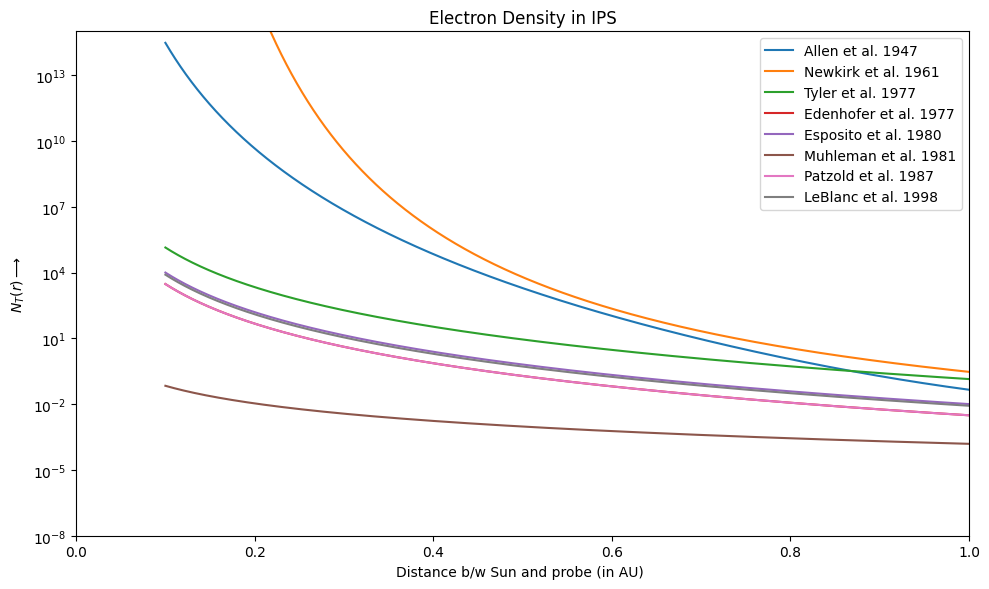

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(10,6),dpi=100)
theta =90 # np.arange(0, 90, 0.0009)
r = np.arange(0.1,5.1,0.00005)

A = (((1.55* (10**14)) / r**6)  + (3.44*(10**11)))* (((np.cos(theta*np.pi))**2 * (1/64)*(np.sin(theta))**2)**(-1/2))   # Tyler et al. 1977
B = (((2.39* (10**14)) / r**6)  + (1.67*(10**12)/ (r**(2.3))))*(10**(-0.9*theta*np.pi/90))                             # Beman et al. 1977
C = (1.58* 10**17)/((r-1)**2)                                                                                          # Cairns et al. 2009
D = 14.2*(10**10)*(10**(4.32/r))                                                                                       # Newkirk et al. 1961
E = (10**14)*((2.99/(r**16))+(1.55/(r**6)))                                                                            # Allen-Baubach et al. 1947
F = (10**12)*((65/(r**5.94))+(0.768/((r-1)**2.25)))                                                                    # Wexler et al. 2019
G = ((8* 10**13)/(r**6))+((4.1* 10**12)/(r**4))+((3.3* 10**11)/(r**2))                                                 # LeBlanc et al. 1998 
H = (10**12)*((30/r**6)+(1/r**2.2))                                             # HELIOS 2                             # Patzold et al. 1987
I = (10**12)*((100/r**6)+(0.5/r**2.1))                                          # HELIOS 2                             # Esposito et al. 1980
J = (10**12)*((1.32/r**2.7)+(0.23/r**2.04))                                     # VIKING                               # Muhleman et al 1981
K = (10**12)*((30/r**6)+(1/r**2.2))                                             #1976 HELIOS DATA                      # Edenhofer et al. 1977

# %matplotlib qt
plt.plot(r,E/10**16, label = "Allen et al. 1947")
plt.plot(r,D/10**16, label = "Newkirk et al. 1961")
plt.plot(r,A/10**16, label ="Tyler et al. 1977")
# plt.plot(r,B/10**16, label = "Beman et al. 1977")
plt.plot(r,K/10**16, label = "Edenhofer et al. 1977")
plt.plot(r,I/10**16, label = "Esposito et al. 1980")
plt.plot(r,J/10**16, label = "Muhleman et al. 1981")
plt.plot(r,H/10**16, label = "Patzold et al. 1987")
plt.plot(r,G/10**16, label = "LeBlanc et al. 1998")
# plt.plot(r,C/10**16, label = "Cairns et al. 2009")
# plt.plot(r,F/10**16, label = "Wexler et al. 2019")

plt.yscale('log')
plt.title("Electron Density in IPS")
# plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='best')
plt.ylim(10**(-8),10**15)
plt.xlim(0,1)
plt.ylabel("$N_T(r) \longrightarrow$")
plt.xlabel("Distance b/w Sun and probe (in AU) ")
plt.tight_layout()
plt.savefig('models_density.png')
plt.show()


#### Density models code compared with our observations

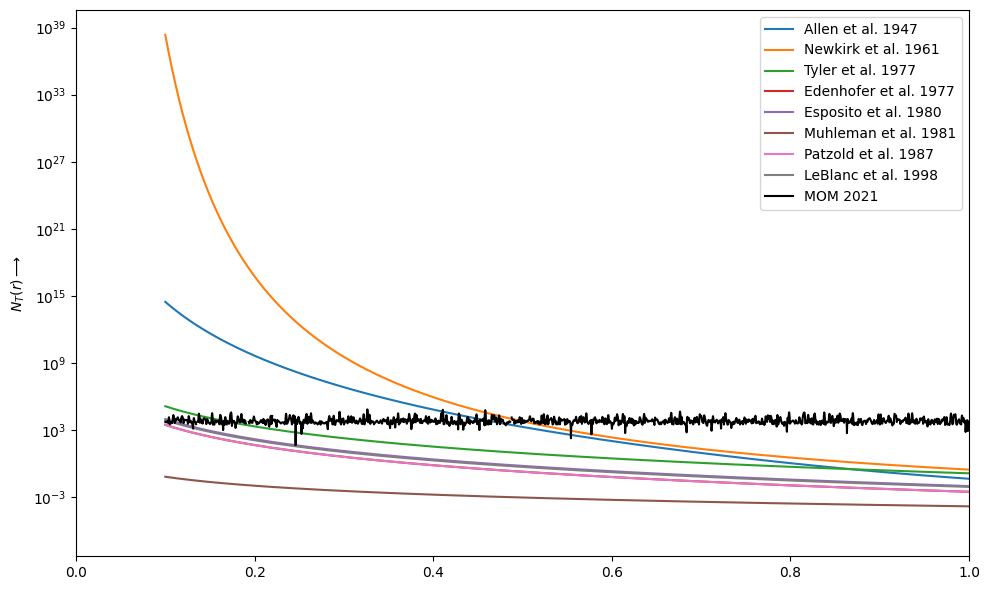

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(10,6),dpi=100)
theta =90 # np.arange(0, 90, 0.0009)
r = np.arange(0.1,5.1,0.00005)

nom = len(density)
# number =6100 # nom/2 +1.5
# print(number)
density_2 = density[6100:]

density_interp = interp.interp1d(np.arange(density_2.size),density_2)
density_stretch = density_interp(np.linspace(0,density_2.size-1,r.size))


A = (((1.55* (10**14)) / r**6)  + (3.44*(10**11)))* (((np.cos(theta*np.pi))**2 * (1/64)*(np.sin(theta))**2)**(-1/2))   # Tyler et al. 1977
B = (((2.39* (10**14)) / r**6)  + (1.67*(10**12)/ (r**(2.3))))*(10**(-0.9*theta*np.pi/90))                             # Beman et al. 1977
C = (1.58* 10**17)/((r-1)**2)                                                                                          # Cairns et al. 2009
D = 14.2*(10**10)*(10**(4.32/r))                                                                                       # Newkirk et al. 1961
E = (10**14)*((2.99/(r**16))+(1.55/(r**6)))                                                                            # Allen-Baubach et al. 1947
F = (10**12)*((65/(r**5.94))+(0.768/((r-1)**2.25)))                                                                    # Wexler et al. 2019
G = ((8* 10**13)/(r**6))+((4.1* 10**12)/(r**4))+((3.3* 10**11)/(r**2))                                                 # LeBlanc et al. 1998 
H = (10**12)*((30/r**6)+(1/r**2.2))                                             # HELIOS 2                             # Patzold et al. 1987
I = (10**12)*((100/r**6)+(0.5/r**2.1))                                          # HELIOS 2                             # Esposito et al. 1980
J = (10**12)*((1.32/r**2.7)+(0.23/r**2.04))                                     # VIKING                               # Muhleman et al 1981
K = (10**12)*((30/r**6)+(1/r**2.2))                                             #1976 HELIOS DATA                      # Edenhofer et al. 1977

# %matplotlib qt
plt.plot(r,E/10**16, label = "Allen et al. 1947")
plt.plot(r,D/10**16, label = "Newkirk et al. 1961")
plt.plot(r,A/10**16, label ="Tyler et al. 1977")
# plt.plot(r,B/10**16, label = "Beman et al. 1977")
plt.plot(r,K/10**16, label = "Edenhofer et al. 1977")
plt.plot(r,I/10**16, label = "Esposito et al. 1980")
plt.plot(r,J/10**16, label = "Muhleman et al. 1981")
plt.plot(r,H/10**16, label = "Patzold et al. 1987")
plt.plot(r,G/10**16, label = "LeBlanc et al. 1998")
# plt.plot(r,C/10**16, label = "Cairns et al. 2009")
# plt.plot(r,F/10**16, label = "Wexler et al. 2019")

# plt.scatter(r,density_stretch/10**16,s= 0.01, color ='k',label="MOM 2021")
plt.plot(r,density_stretch/10**16,'k-',label="MOM 2021")
plt.yscale('log')
# plt.title("Electron Density in IPS")
# plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='best')
# plt.ylim(10**(-8),10**15)
plt.xlim(0,1)
plt.ylabel("$N_T(r) \longrightarrow$")
# plt.xlabel("Distance b/w Sun and probe (in AU) ")
plt.tight_layout()
# plt.savefig('models_density.png')
plt.show()


### Plotting


#### Exp_dopp

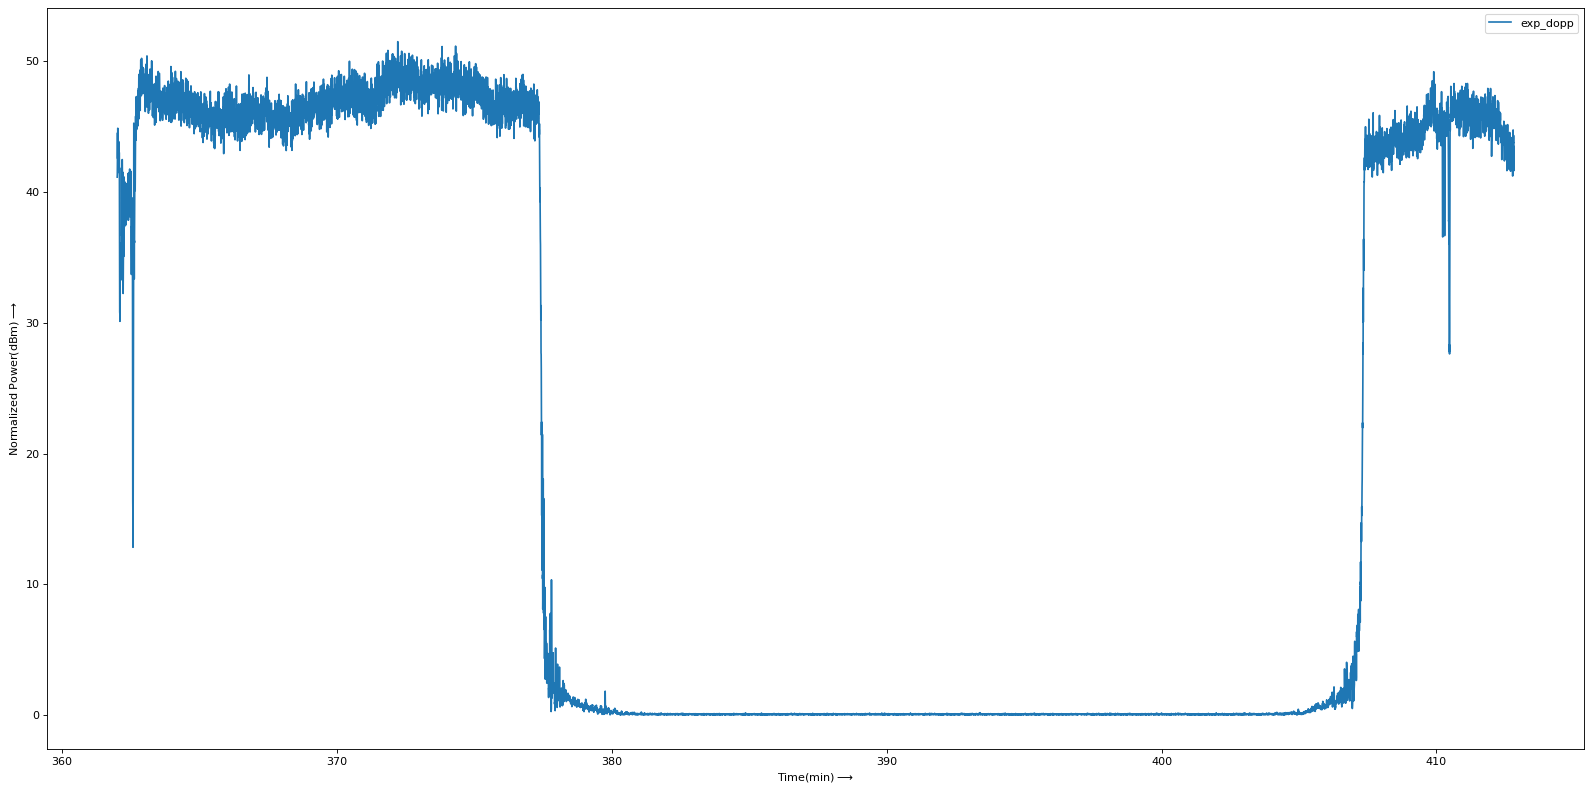

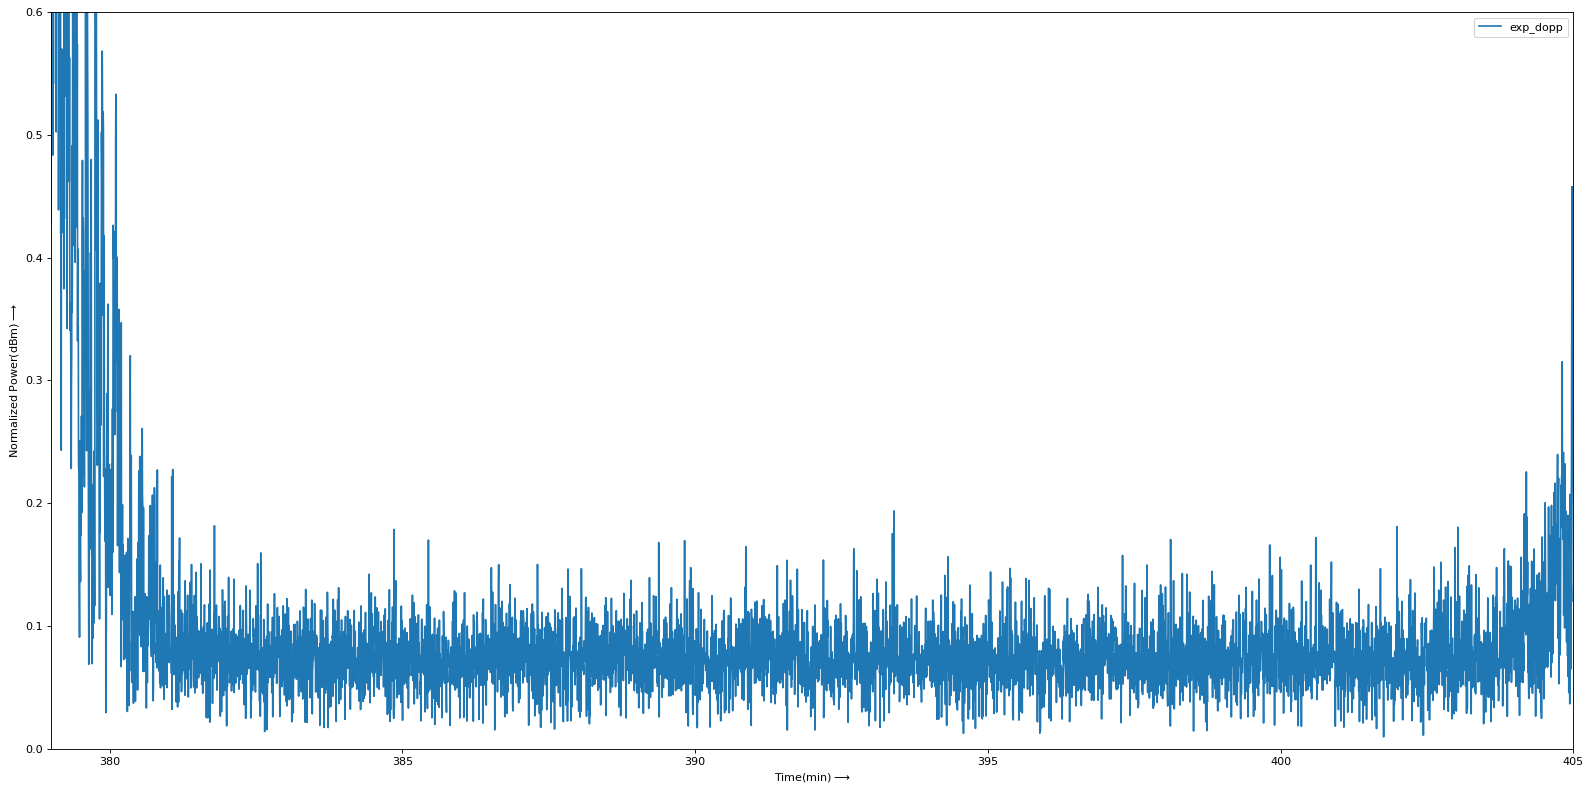

In [ ]:
fig = plt.figure(figsize = (20,10) , dpi= 80)
plt.plot(timesec/60, power_total,label = "exp_dopp")
plt.xlabel("Time(min)$\longrightarrow$")
plt.ylabel("Normalized Power(dBm)$\longrightarrow$")
# plt.title("test_plot")
plt.legend(loc = 'best')
plt.tight_layout()
# fig.savefig('trial.png')
plt.show()
#-----------------------------------------------------------------------------------------------------------------
fig = plt.figure(figsize = (20,10) , dpi= 80)
plt.plot(timesec/60, power_total,label = "exp_dopp")
plt.xlabel("Time(min)$\longrightarrow$")
plt.ylabel("Normalized Power(dBm)$\longrightarrow$")
plt.xlim(379,405)
plt.ylim(0,0.6)
plt.legend(loc = 'best')
plt.tight_layout()
# fig.savefig('trial.png')
plt.show()

#### Doppler

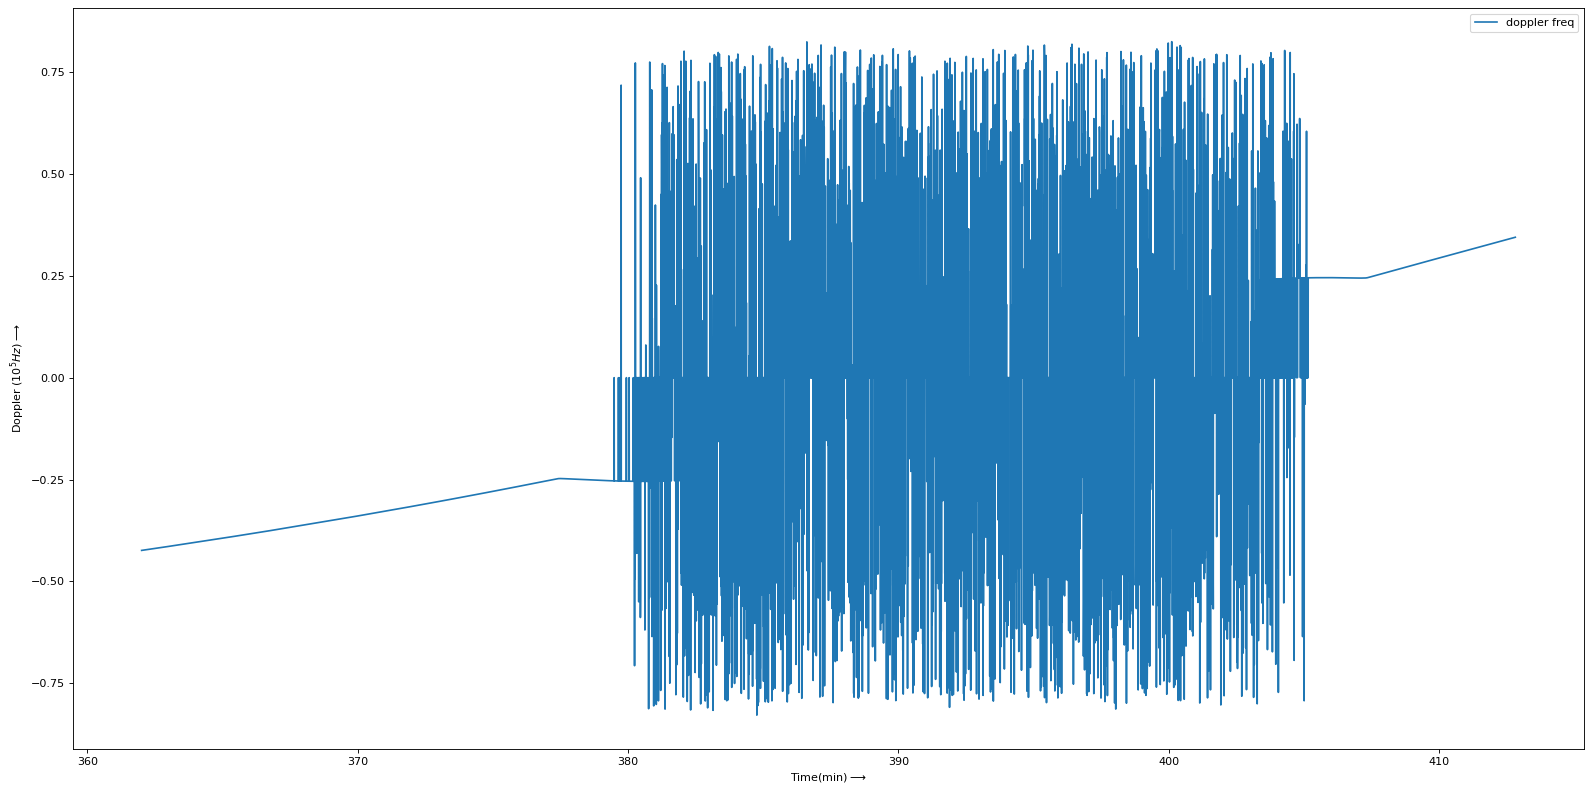

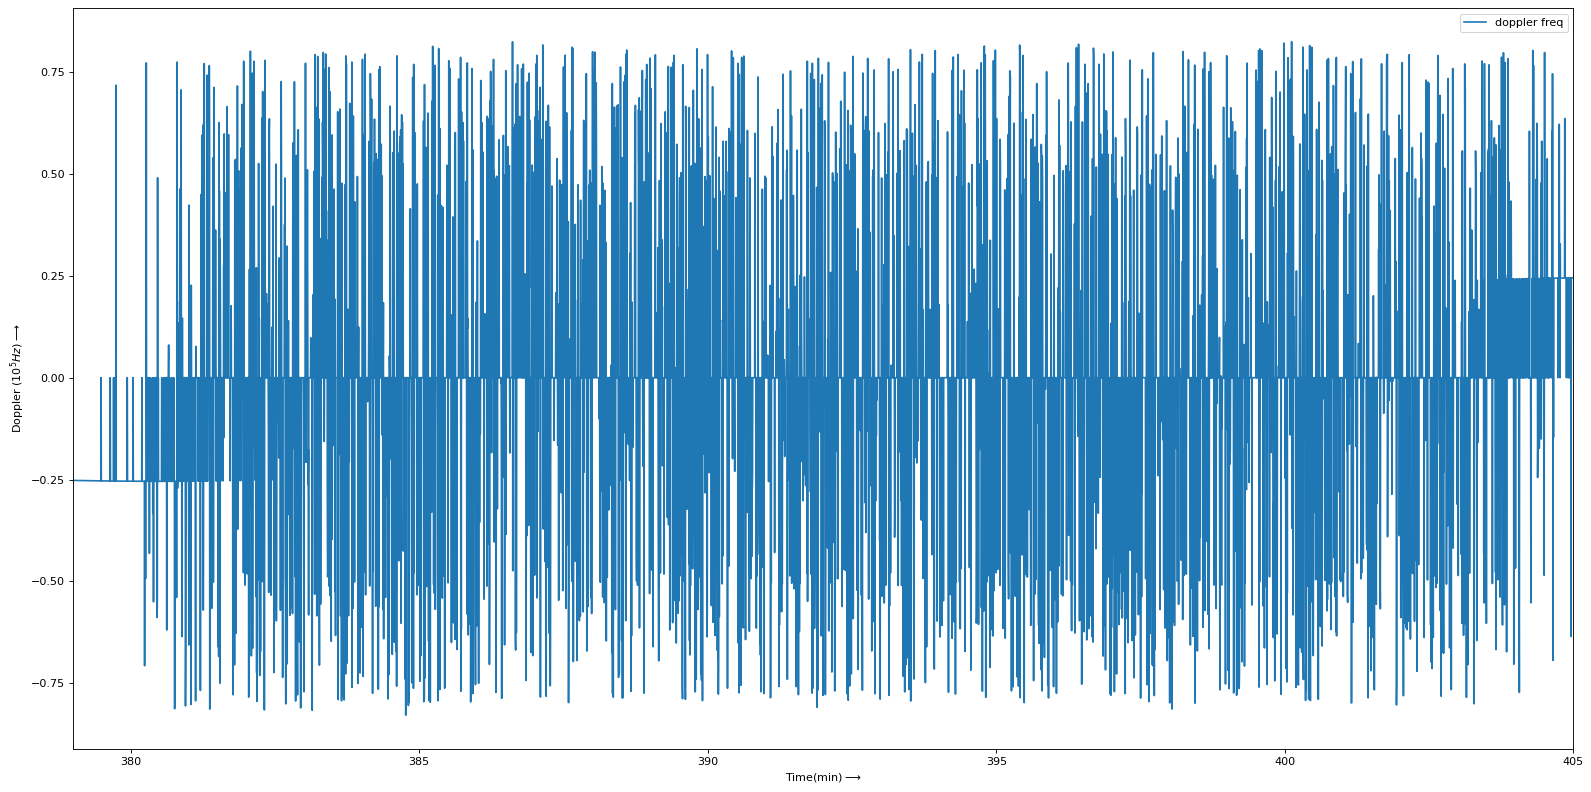

In [ ]:
fig = plt.figure(figsize = (20,10) , dpi= 80)
# plt.plot(timesec/60, exp_dopp/(10**6),label = "exp_dopp")
plt.plot(timesec/60,dopp_firstmoment/(10**5),label ="doppler freq")
plt.xlabel("Time(min)$\longrightarrow$")
plt.ylabel("Doppler $ (10^5 Hz) \longrightarrow$")
# plt.title("test_plot")
plt.legend(loc = 'best')
plt.tight_layout()
# fig.savefig('trial.png')
plt.show()

fig = plt.figure(figsize = (20,10) , dpi= 80)
# plt.plot(timesec/60, exp_dopp/(10**6),label = "exp_dopp")
plt.plot(timesec/60,dopp_firstmoment/(10**5),label ="doppler freq")
plt.xlabel("Time(min)$\longrightarrow$")
plt.ylabel("Doppler $ (10^5 Hz) \longrightarrow$")
# plt.title("test_plot")
plt.xlim(379,405)
plt.legend(loc = 'best')
plt.tight_layout()
# fig.savefig('trial.png')
plt.show()

#### Spectral broadening

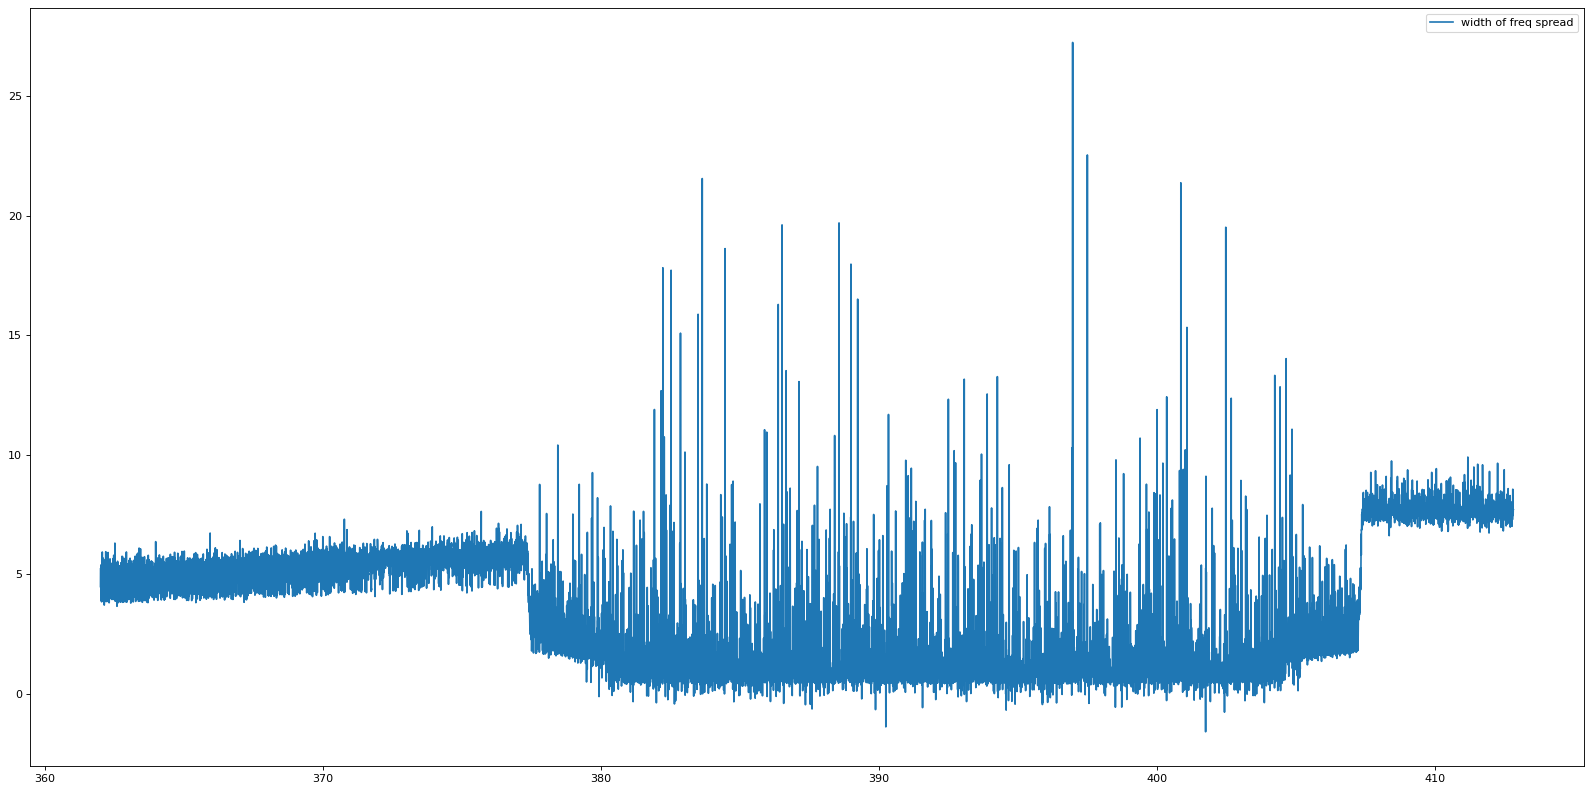

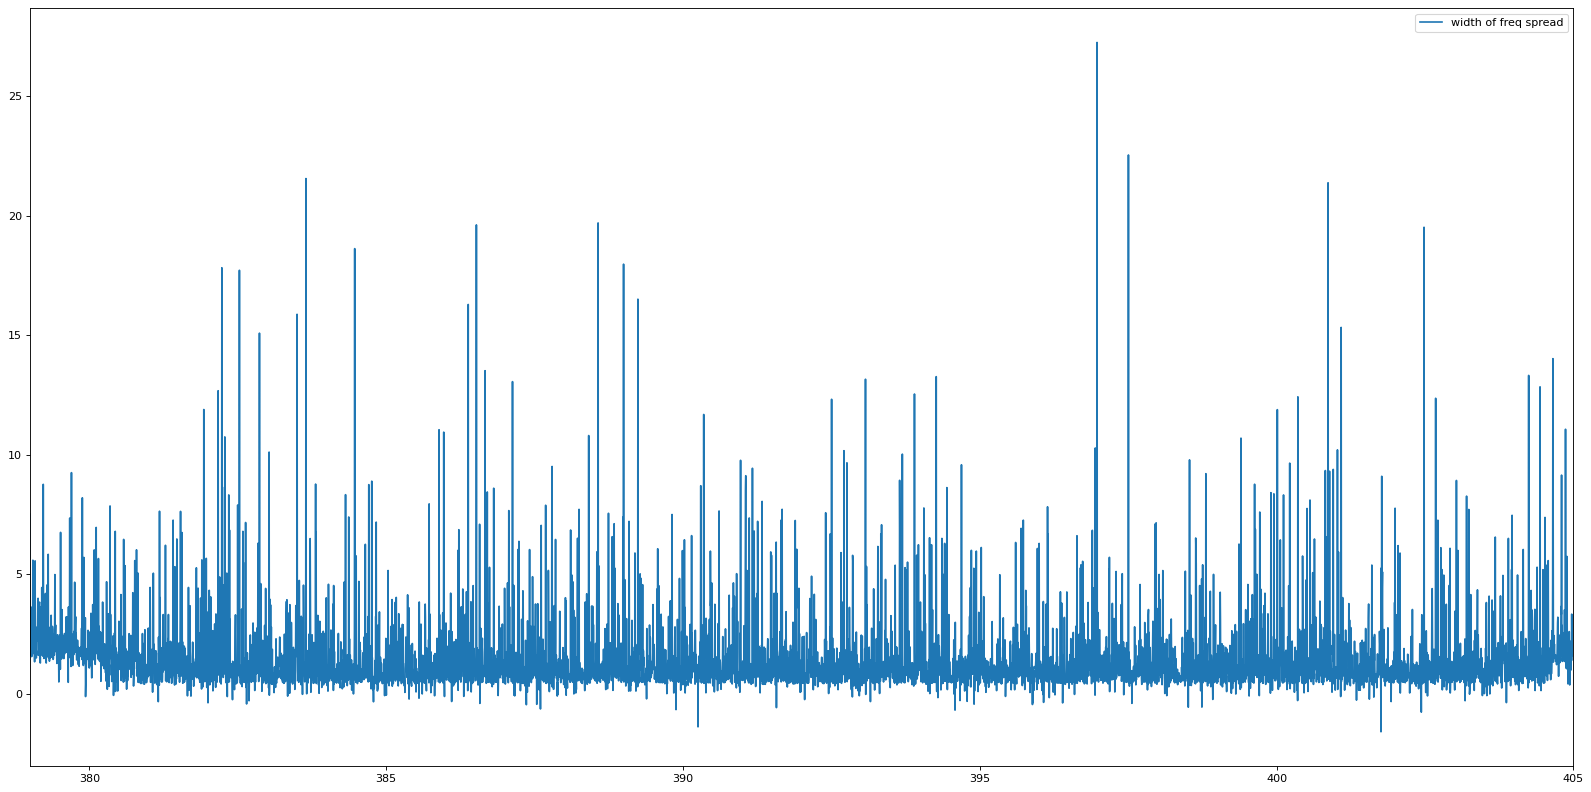

In [ ]:
fig = plt.figure(figsize = (20,10) , dpi= 80) 
plt.plot(timesec/60,second_moment,label = "width of freq spread")
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

fig = plt.figure(figsize = (20,10) , dpi= 80) 
plt.plot(timesec/60,second_moment,label = "width of freq spread")
plt.legend(loc = 'best')
plt.xlim(379,405)
plt.tight_layout()
plt.show()

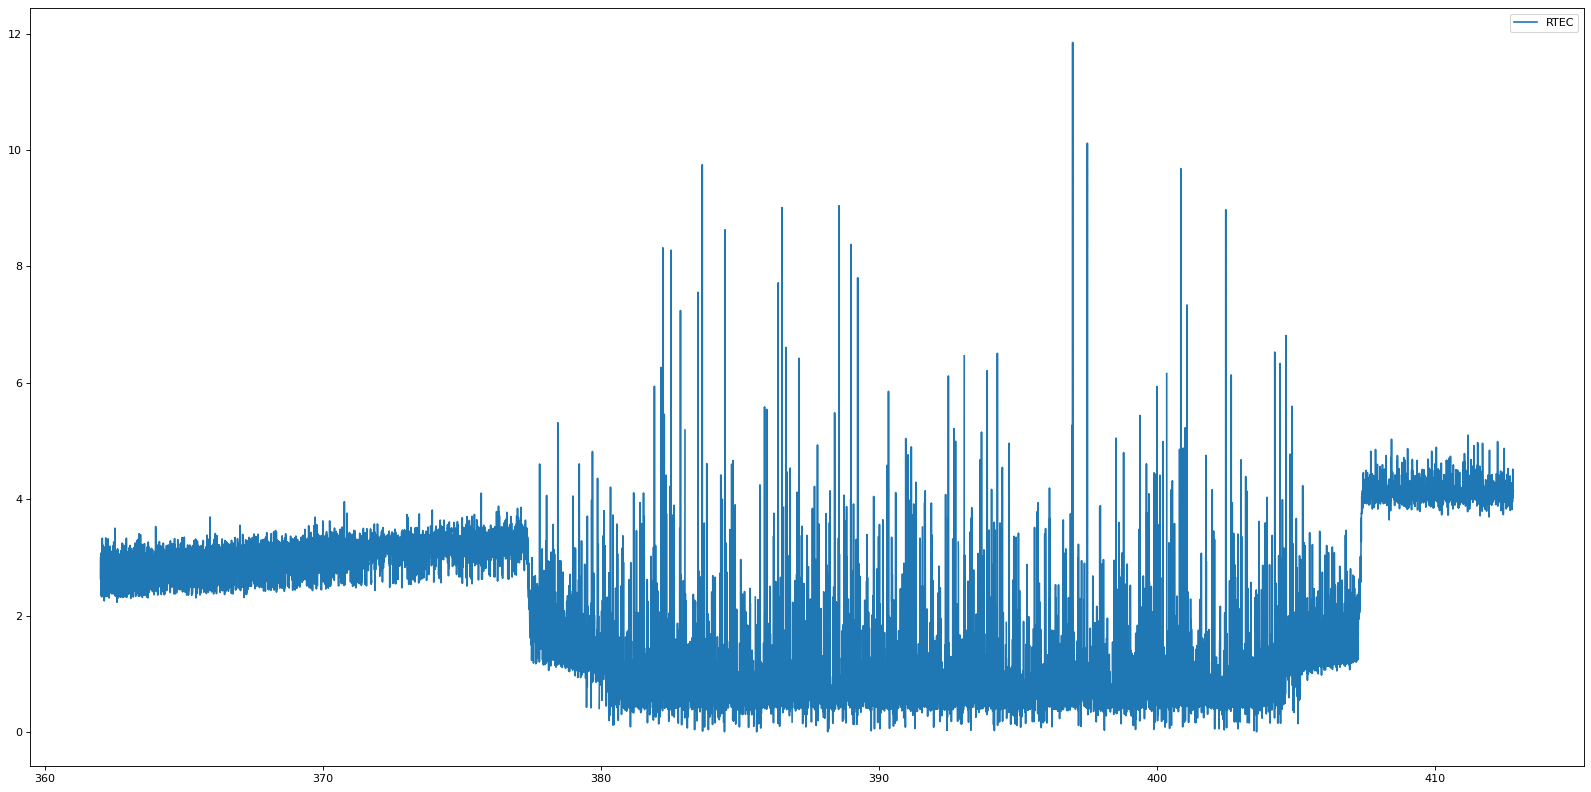

In [ ]:
float_RTEC = []
for item in RTEC:
    float_RTEC.append(float(item/10**30))


# print(float_RTEC)
fig = plt.figure(figsize = (20,10) , dpi= 80) 
plt.plot(timesec/60,float_RTEC,label="RTEC")
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

#### Doppler

2.92002


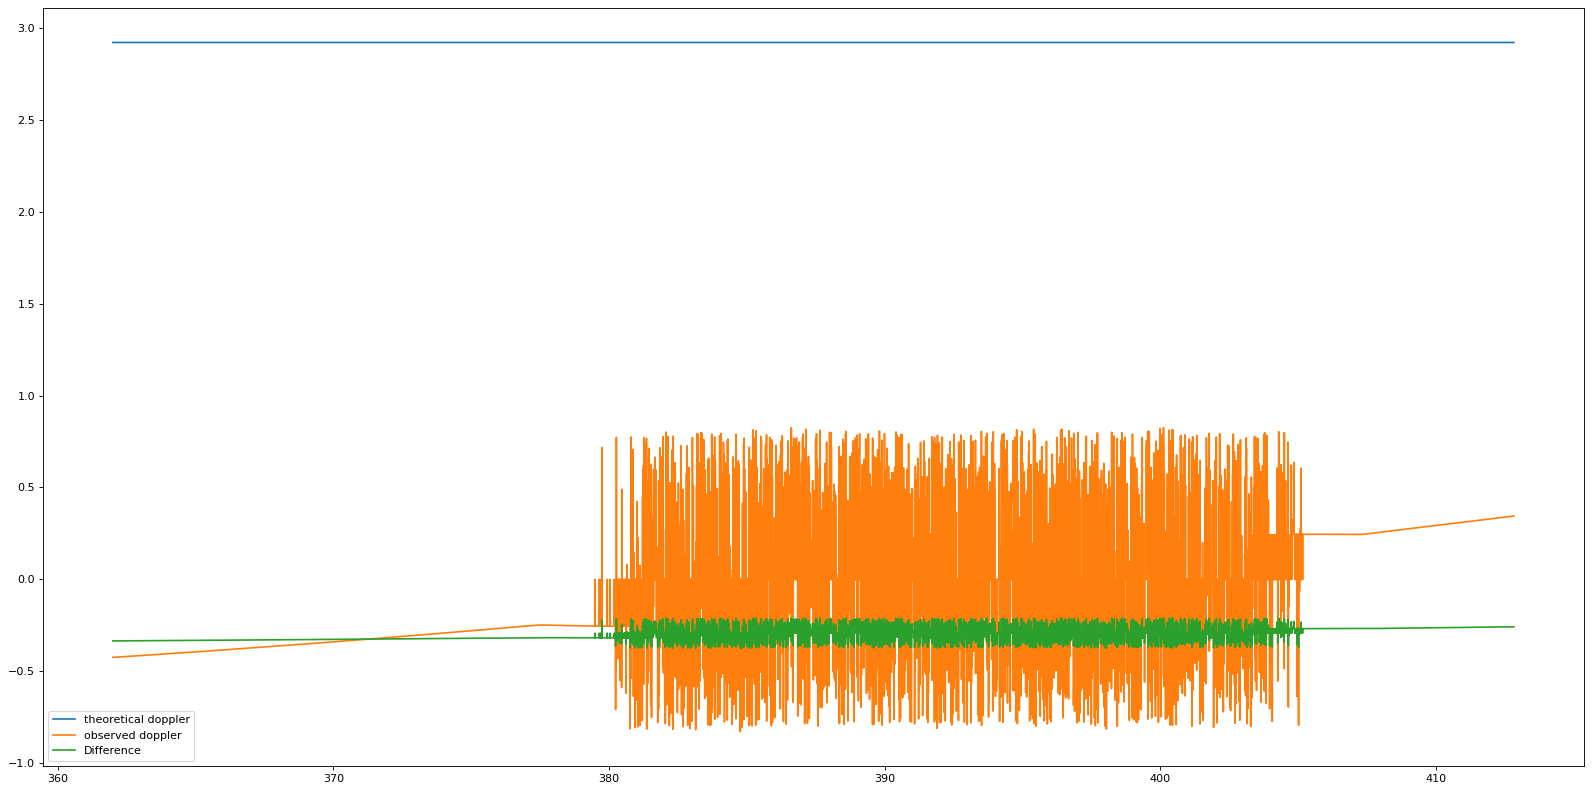

In [ ]:
c=299792458
signal_received = 8410640000.0
signal_transmitted = 8410932002.0000   
theoretical_doppler1= signal_transmitted-signal_received
print(theoretical_doppler1/10**5)

b = np.empty(len(timesec))
b.fill(theoretical_doppler1)

fig = plt.figure(figsize = (20,10) , dpi= 80) 
plt.plot(timesec/60,b/(10**5),label = "theoretical doppler")
plt.plot(timesec/60,(dopp_firstmoment)/(10**5) ,label = "observed doppler")
plt.plot(timesec/60,(dopp_firstmoment-b)/(10**6) ,label = "Difference")
plt.legend(loc = 'best')
# plt.xlim(379,405)
plt.tight_layout()
plt.show()

#### RTEC

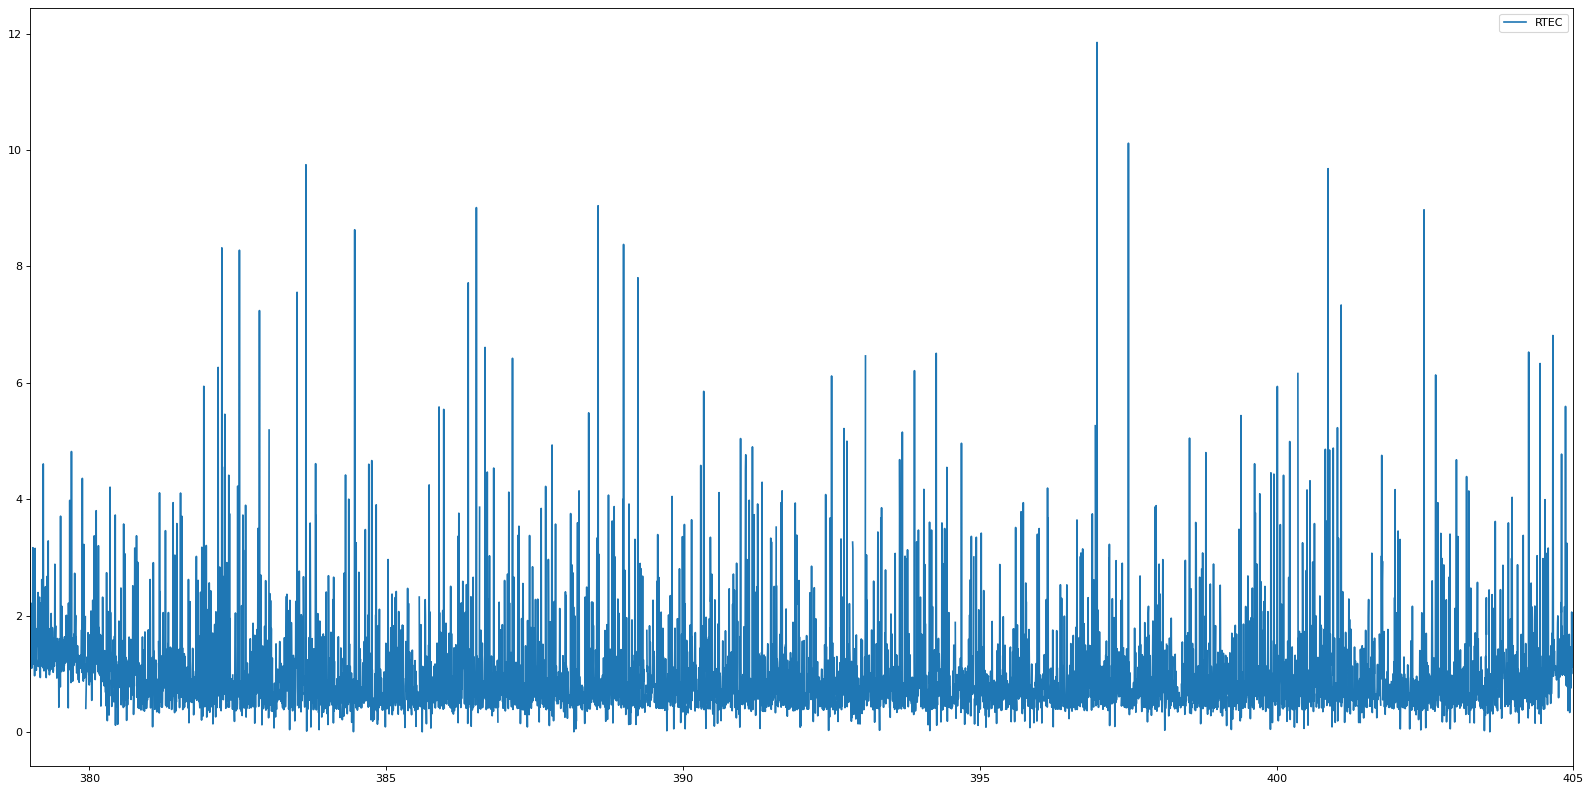

In [ ]:
fig = plt.figure(figsize = (20,10) , dpi= 80) 
plt.plot(timesec/60,float_RTEC,label="RTEC")
plt.legend(loc = 'best')
plt.xlim(379,405)
plt.tight_layout()
plt.show()
